<a href="https://colab.research.google.com/github/indr2019/Board-Infinity-homework/blob/master/Python_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# Creating a dataframe for the exercise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
tips = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vTPqLOTtWjWnbPtQdTUq-CrGRnxiWRJ-Pfz2VAt8hxzPzS9E_plqoY6RbGXk8upHa2N6CM9RHkuq0N7/pub?output=xlsx')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB



#### Q1:What is the overall average tip?

In [7]:
tips['tip'].mean()

2.9982786885245902

#### Q2: Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [9]:
# Summary for 'tip'
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [15]:
np.median(tips['tip'])

2.9

In [16]:
np.mean(tips['tip'])

2.9982786885245902

The mean and median for the column 'tip' is the similar. Hence on an average customers have tipped close to $3

#### Q3: Prepare a boxplot for 'tip', are there any outliers?

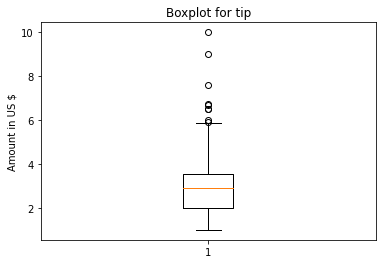

In [20]:
# boxplot for 'tip'

plt.boxplot(tips['tip'])
plt.title('Boxplot for tip')
plt.ylabel('Amount in US $')
plt.show()

Yes there are outliers present between 7 USD to 10 USD

#### Q4: Prepare a boxplot for 'total_bill', are there any outliers?

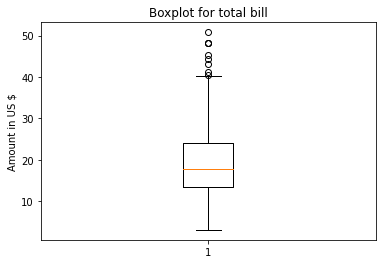

In [21]:
#  Boxplot for 'total_bill'

plt.boxplot(tips['total_bill'])
plt.title('Boxplot for total bill')
plt.ylabel('Amount in US $')
plt.show()

Yes there are outliers present for column 'total_bill'

#### Q5: Gender: what is the percent of females in the data? 

In [22]:
# Percentage of females in the data
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [56]:
fem_perc = (87/244)*100
print('Percentage of females is ',round(fem_perc,2))

Percentage of females is  35.66


#### Q6: Prepare a bar plot with the bars representing the percentage of records for each gender.

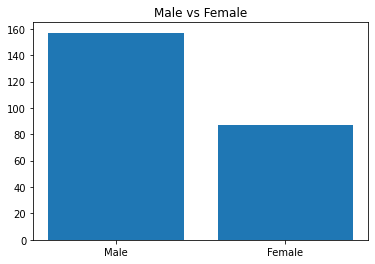

In [32]:
plt.bar(tips['sex'].value_counts().keys(), tips['sex'].value_counts().values)
plt.title('Male vs Female')
plt.show()

#### Q7: Does the average tip differ by gender? Does one gender tip more than the other?

In [35]:
tips.groupby(['sex']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


On an average males and females tip almost the same however on maximum value the males tip more than the females

#### Q8: Does the average tip differ by the time of day?

In [38]:
tips.groupby(['sex', 'time']).describe()['tip']

count      mean       std   min    25%   50%     75%    max
sex    time                                                               
Female Dinner   52.0  3.002115  1.193483  1.00  2.230  3.00  3.5275   6.50
       Lunch    35.0  2.582857  1.075108  1.25  1.915  2.01  3.1150   5.17
Male   Dinner  124.0  3.144839  1.529116  1.00  2.000  3.00  3.7225  10.00
       Lunch    33.0  2.882121  1.329017  1.44  2.000  2.31  4.0000   6.70

On an average the males and females tip almost the same for the time of the day. However on higher side the males are tipping more than females during dinner

#### Q9: Does the average tip differ by size (number of people at the table)? 

In [39]:
tips.groupby(['day']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70


The average tip differs slightly by size of people if we consider the number of people for that day of the week

#### Q10: Do smokers tip more than non-smokers?

In [40]:
tips.groupby(['smoker']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


No. Smokers and non smokers on an average are tipping almost the same

#### Q11: Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [41]:
tips.groupby(['smoker', 'sex']).describe()['tip']

count      mean       std   min  25%   50%     75%   max
smoker sex                                                             
No     Female   54.0  2.773519  1.128425  1.00  2.0  2.68  3.4375   5.2
       Male     97.0  3.113402  1.489559  1.25  2.0  2.74  3.7100   9.0
Yes    Female   33.0  2.931515  1.219916  1.00  2.0  2.88  3.5000   6.5
       Male     60.0  3.051167  1.500120  1.00  2.0  3.00  3.8200  10.0

Male smokers tip the most

#### Q12: Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [75]:
tips['pct_tip'] = (tips['tip']/tips['total_bill'])*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


Thus a new column is added called 'pct_tip

#### Q13: Does pct_tip differ by gender? Does one gender tip more than the other? 

In [73]:
tips.groupby(['sex']).describe()['pct_tip']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,16.649074,5.363173,5.643341,14.041645,15.558149,19.426621,41.666667
Male,157.0,15.765055,6.477787,3.563814,12.138869,15.349194,18.623962,71.034483


Females tip percentage is more than males

#### Q14: Does pct_tip differ by size (number of people at the table)? 

In [76]:
tips.groupby(['day']).describe()['pct_tip']

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,16.991303,4.766531,10.355540,13.373871,15.562472,19.663729,26.348039
Sat,87.0,15.315172,5.129259,3.563814,12.386329,15.183246,18.827082,32.573290
Sun,76.0,16.689729,8.473889,5.944673,11.998208,16.110332,18.788908,71.034483
Thur,62.0,16.127563,3.865182,7.296137,13.820958,15.384615,19.268675,26.631158


Yes. pct_tip differs by size

#### Q15: Make the gender vs. smoker view using pct_tip  - does your inference change?

In [77]:
tips.groupby(['smoker', 'sex']).describe()['pct_tip']

count       mean       std  ...        50%        75%        max
smoker sex                                 ...                                 
No     Female   54.0  15.692097  3.642118  ...  14.969118  18.162966  25.267250
       Male     97.0  16.066872  4.184875  ...  15.760441  18.621974  29.198966
Yes    Female   33.0  18.215035  7.159451  ...  17.391304  19.821606  41.666667
       Male     60.0  15.277118  9.058794  ...  14.101483  19.169707  71.034483

[4 rows x 8 columns]

Female smokers have higher average of tip percentage

#### Q16: Make a scatter plot of total_bill vs. tip.

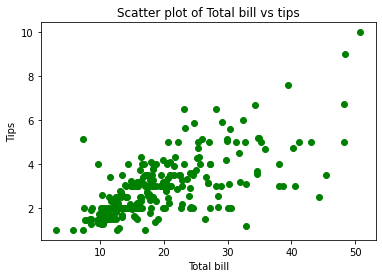

In [79]:
# scatter plot of total_bill vs tip

plt.scatter(tips['total_bill'],tips['tip'],c='green')
plt.title('Scatter plot of Total bill vs tips')
plt.xlabel('Total bill')
plt.ylabel('Tips')
plt.show()

#### Q17: Make a scatter plot of total_bill vs. pct_tip.

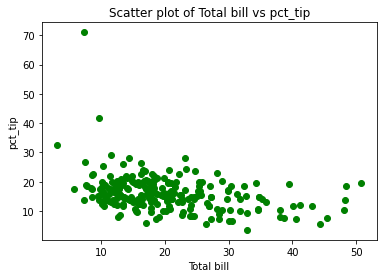

In [80]:
# scatter plot of total_bill vs pct_tip

plt.scatter(tips['total_bill'],tips['pct_tip'],c='green')
plt.title('Scatter plot of Total bill vs pct_tip')
plt.xlabel('Total bill')
plt.ylabel('pct_tip')
plt.show()